# **Lab10 - K-Means Clustering**

## 1.Load a dataset (e.g., Mall Customer Segmentation).

In [1]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
def data_summary(dataframe):
    summary = pd.DataFrame({
        'Data Type': dataframe.dtypes,
        'Missing Values': dataframe.isnull().sum(),
        'Unique Values': dataframe.nunique(),
        'Encode catagorical': [dataframe[col].dtype == 'object' for col in dataframe.columns]
    })
    
    return summary

data_summary(df)

,Data Type,Missing Values,Unique Values,Encode catagorical
CustomerID,int64,0,200,False
Genre,object,0,2,True
Age,int64,0,51,False
Annual Income (k$),int64,0,64,False
Spending Score (1-100),int64,0,84,False


## 2.Apply data preprocessing (normalization).

K-Means REQUIRES scaling. Distance-based algorithm.

We’ll cluster using:

- Annual Income

- Spending Score

In [3]:
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3.Determine the optimal number of clusters using Elbow Method 

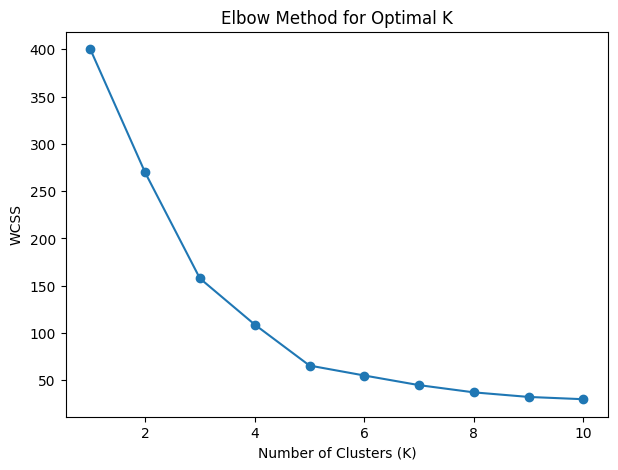

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

## 4.Implement K-Means clustering for the selected value of K.

In [5]:
# implement K-Means Clustering for k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

df['Cluster'] = cluster_labels
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## 5.Visualize the clusters in 2D

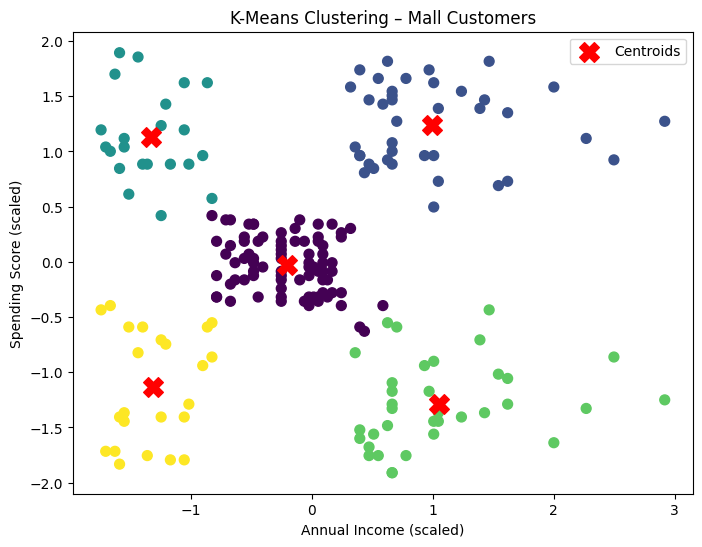

In [6]:
plt.figure(figsize=(8, 6))

plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=cluster_labels,
    cmap='viridis',
    s=50
)

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='red',
    s=200,
    marker='X',
    label='Centroids'
)

plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("K-Means Clustering – Mall Customers")
plt.legend()
plt.show()


## 6.Evaluate the clustering: Although K-Means is unsupervised, since the Iris dataset has labels, we can compare them.

## Load Iris 

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data
y_iris = iris.target


## Scale + K-Means

In [8]:
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=10)
iris_clusters = kmeans_iris.fit_predict(X_iris_scaled)

## Evaluate with ARI

In [9]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y_iris, iris_clusters)
print("Adjusted Rand Index (ARI):", ari)


Adjusted Rand Index (ARI): 0.6201351808870379
